<a href="https://colab.research.google.com/github/vedprakash226/VisionVerse/blob/main/DownSampling_and_Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,color
from skimage.transform import resize

In [ ]:
def display_images(images, titles):
    plt.figure(figsize=(20, 8))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i],cmap="gray")
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

Image Input Given

In [ ]:
input_image_path = 'https://images.unsplash.com/photo-1617243876873-6cea4ea0b4eb?q=80&w=1887&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'


# **Downsampling** of the image by some give factor

In [ ]:
#Function to down sample the image according to the given factor

def image_sampling(input_image, sampling_factor):

    img = io.imread(input_image)    #Numpy array having pixel values created

    # print(img.shape)      ->  size before sampling
    new_height = img.shape[0] // sampling_factor
    new_width = img.shape[1] // sampling_factor
    # print(new_height, new_width)    ->  size of the downsampled img

    downsampled_img = resize(img, (new_height, new_width), mode='constant', anti_aliasing=False)        #Downsampled image

    return downsampled_img

In [ ]:
sampling_factors = [2,4, 8, 16, 32]

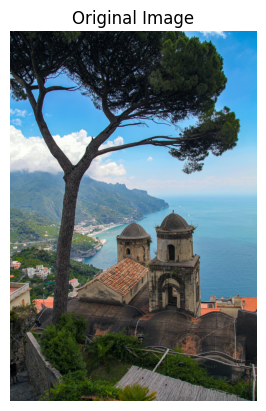

In [ ]:
original_image = io.imread(input_image_path)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.show()


In [ ]:
# downsampled_images = []
# for factor in sampling_factors:
#   np.append(downsampled_images, image_sampling(input_image,factor))

# titles = np.array([],ndim=2)
# for i in sampling_factors:
#   line = f'Downsampled {i}x'
#   np.append(titles,line)

# print(titles)

downsampled_images = [image_sampling(input_image_path, factor) for factor in sampling_factors]
titles = [f'Downsampled {factor}x' for factor in sampling_factors]

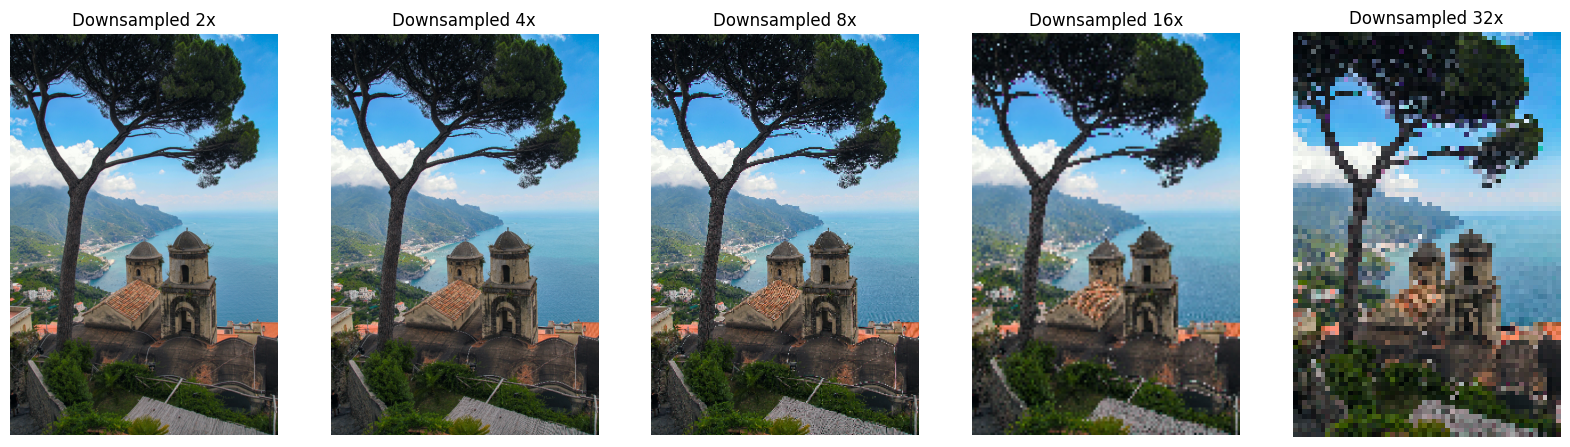

In [ ]:
display_images(downsampled_images, titles)

# **Quantization**

In [ ]:
def image_quantization(input_image, num_levels):
    img = io.imread(input_image)

    # grayscaling if image in color
    if img.ndim == 3:     #RGB components in the image
        img = color.rgb2gray(img)

    quantization_levels = np.linspace(0, 1, num_levels)   #generated the levels

    quantized_img = np.digitize(img, quantization_levels) - 1   #mapping each pixel to the levels

    return quantized_img

In [ ]:
quantization_levels = [2,4, 8, 16,32]

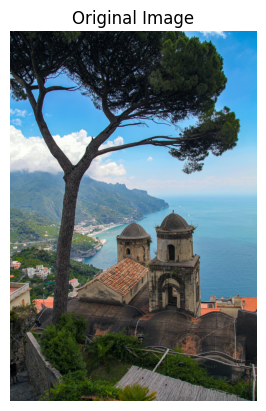

In [ ]:
original_image = io.imread(input_image_path)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.show()


In [ ]:
quantized_images = [image_quantization(input_image_path, levels) for levels in quantization_levels]
titles = [f'Quantized {levels} Levels' for levels in quantization_levels]

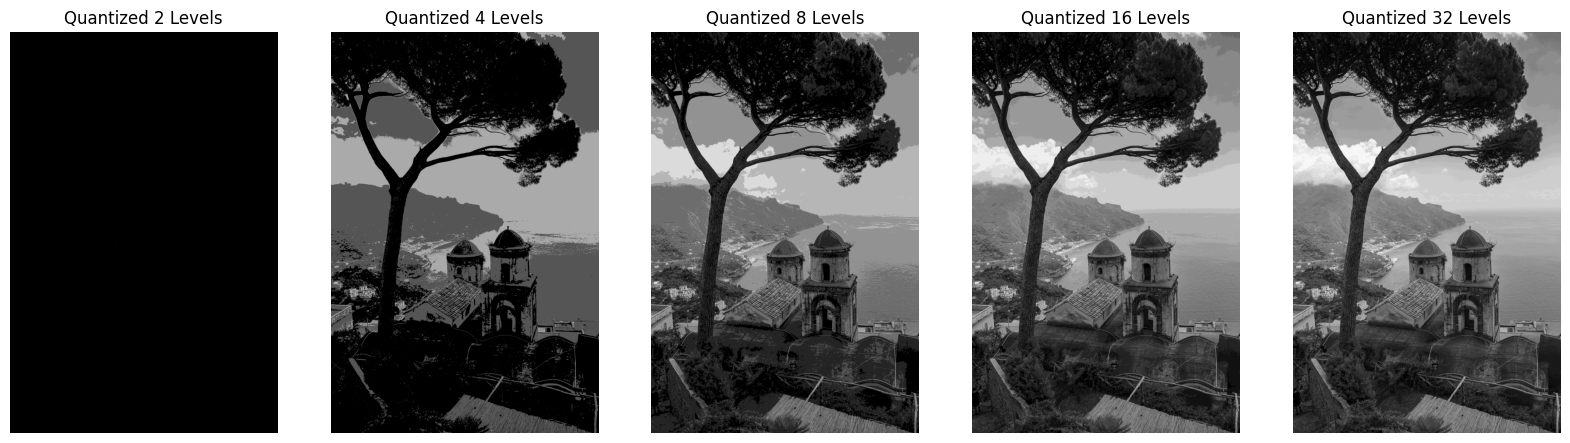

In [ ]:
display_images(quantized_images, titles)